### LSUN church

In [5]:
%load_ext autoreload
%autoreload 2

In [1]:
!ls "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Datasets/LSUN_church"

church_outdoor_train_lmdb_color_64.npy


In [26]:
import torch
import numpy as np
from glob import glob
from PIL import Image
from os.path import join
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [ ]:
dataset_root = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Datasets/"
data_tsr = np.load(join(dataset_root, "LSUN_church", "church_outdoor_train_lmdb_color_64.npy"))
print(data_tsr.shape) # (126227, 64, 64, 3)

In [ ]:
data_tsr_torch = torch.from_numpy(data_tsr).permute(0, 3, 1, 2) / 255.0  # (N, H, W, C) -> (N, C, H, W)
print(data_tsr_torch.shape)  # should be (126227, 3, 64, 64)

torch.Size([126227, 3, 64, 64])


### Make 32x32 dataset of LSUN church

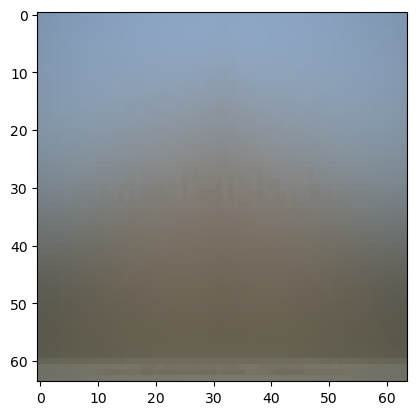

In [24]:
plt.imshow(data_tsr_torch.mean(dim=0).permute(1, 2, 0))
plt.show()

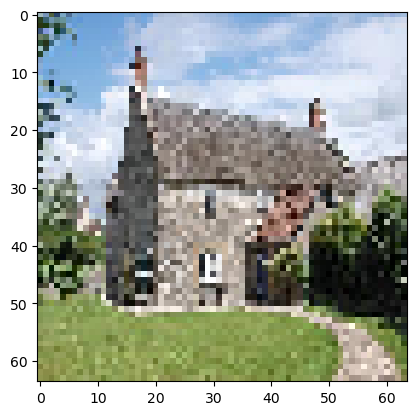

In [ ]:
plt.imshow(data_tsr_torch[1].permute(1, 2, 0))
plt.show()

In [53]:
data_tsr_torch = torch.from_numpy(data_tsr).permute(0, 3, 1, 2) / 255.0  # (N, H, W, C) -> (N, C, H, W)
# Downscale to 32x32 using bilinear interpolation
data_tsr_torch_32 = F.interpolate(data_tsr_torch, size=(32, 32), mode='bilinear', 
                                  align_corners=False, antialias=True)
print(data_tsr_torch_32.shape)  # should be (126227, 3, 32, 32)

torch.Size([126227, 3, 32, 32])


In [55]:
torch.save(data_tsr_torch_32, join(dataset_root, "LSUN_church", "church_train_32x32.pt"))

In [54]:
print(data_tsr_torch_32.max())
print(data_tsr_torch_32.min())

tensor(1.)
tensor(0.)


### LSUN bedroom 

In [75]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

bedroom_root = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Datasets/LSUN_bedroom_20pc/"
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.CenterCrop((256, 256)),
    transforms.Resize((64, 64)),
])
bedroom_dataset = ImageFolder(root=bedroom_root, transform=transform)
print(f"Loaded LSUN bedroom dataset with {len(bedroom_dataset)} images.")

# Example: Get one image and label
img, label = bedroom_dataset[0]
print("Image shape:", img.shape, "Label:", label)

Loaded LSUN bedroom dataset with 606250 images.
Image shape: torch.Size([3, 64, 64]) Label: 0


In [76]:
from torch.utils.data import DataLoader
from tqdm.auto import tqdm  # works in terminal, Jupyter, VSCode, etc.
loader = DataLoader(bedroom_dataset, batch_size=1024, num_workers=16, 
                    shuffle=False, drop_last=False)
batches = []
for batch in tqdm(loader, desc="Loading LSUN", unit="batch"):
    batches.append(batch[0])

Xtsr64 = torch.cat(batches, dim=0)

Loading LSUN:   0%|          | 0/593 [00:01<?, ?batch/s]

In [78]:
print(Xtsr64.shape)
print(Xtsr64.min())
print(Xtsr64.max())

torch.Size([606250, 3, 64, 64])
tensor(0.)
tensor(1.0000)


In [79]:
torch.save(Xtsr64, join(dataset_root, "LSUN_bedroom_20pc", "bedroom_train_64x64.pt"))

In [81]:
!du -sh {join(dataset_root, "LSUN_bedroom_20pc", "bedroom_train_64x64.pt")}

28G	/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Datasets/LSUN_bedroom_20pc/bedroom_train_64x64.pt


In [82]:
bedroom_root = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Datasets/LSUN_bedroom_20pc/"
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.CenterCrop((256, 256)),
    transforms.Resize((32, 32)),
])
bedroom_dataset_32 = ImageFolder(root=bedroom_root, transform=transform)
print(f"Loaded LSUN bedroom dataset with {len(bedroom_dataset_32)} images.")


Loaded LSUN bedroom dataset with 606250 images.


In [ ]:
from torch.utils.data import DataLoader
from tqdm.auto import tqdm  # works in terminal, Jupyter, VSCode, etc.
loader = DataLoader(bedroom_dataset_32, batch_size=1024, num_workers=16, 
                    shuffle=False, drop_last=False)
batches = []
for batch in tqdm(loader, desc="Loading LSUN", unit="batch"):
    batches.append(batch[0])

Xtsr32 = torch.cat(batches, dim=0)
print(Xtsr32.shape)
print(Xtsr32.min())
print(Xtsr32.max())
torch.save(Xtsr32, join(dataset_root, "LSUN_bedroom_20pc", "bedroom_train_32x32.pt"))
!du -sh {join(dataset_root, "LSUN_bedroom_20pc", "bedroom_train_32x32.pt")}

Loading LSUN:   0%|          | 0/593 [00:04<?, ?batch/s]

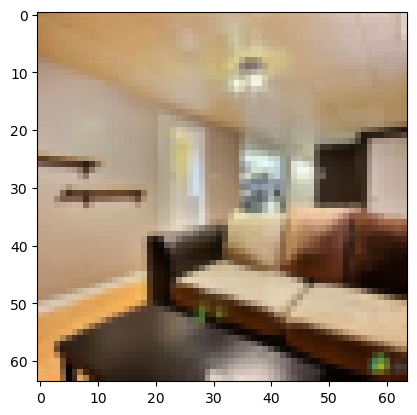

In [71]:
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [65]:
!tree -L 5 /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Datasets/LSUN_bedroom_20pc/

/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Datasets/LSUN_bedroom_20pc/
├── data0
│   └── lsun
│       └── bedroom
│           ├── 0
│           │   ├── 0
│           │   ├── 1
│           │   ├── 2
│           │   ├── 3
│           │   ├── 4
│           │   ├── 5
│           │   ├── 6
│           │   ├── 7
│           │   ├── 8
│           │   ├── 9
│           │   ├── a
│           │   ├── b
│           │   ├── c
│           │   ├── d
│           │   ├── e
│           │   └── f
│           ├── 1
│           │   ├── 0
│           │   ├── 1
│           │   ├── 2
│           │   ├── 3
│           │   ├── 4
│           │   ├── 5
│           │   ├── 6
│           │   ├── 7
│           │   ├── 8
│           │   ├── 9
│           │   ├── a
│           │   ├── b
│           │   ├── c
│           │   ├── d
│           │   ├── e
│           │   └── f
│           ├── 2
│           │   ├── 0
│           │   ├── 1
│           │   ├── 2
│           │   ├── 3
│           │   ├── 4
│ 

### CIFAR100

In [ ]:
import torchvision
import torchvision.transforms as transforms
# Load CIFAR100 training set
cifar100_train = torchvision.datasets.CIFAR100(
    root='/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Data',
    train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor()
    ])
)
print(f"CIFAR100 train dataset size: {len(cifar100_train)}")
print(f"Image shape: {cifar100_train[0][0].shape}")  # (C, H, W)
print(cifar100_train[0][0].max())
print(cifar100_train[0][0].min())

CIFAR100 train dataset size: 50000
Image shape: torch.Size([3, 32, 32])
tensor(1.)
tensor(0.0039)


In [35]:
print("CIFAR100 class labels:", cifar100_train.classes)


CIFAR100 class labels: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 

In [37]:
label_vec = [cifar100_train[k][1] for k in range(len(cifar100_train))]
Xtsr_raw = torch.stack([cifar100_train[k][0] for k in range(len(cifar100_train))])
print(Xtsr_raw.shape)

torch.Size([50000, 3, 32, 32])


In [ ]:
cifar100_train = torchvision.datasets.CIFAR100(
    root='/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Data',
    train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor()
    ])
)
label_vec = [cifar100_train[k][1] for k in range(len(cifar100_train))]
Xtsr_raw = torch.stack([cifar100_train[k][0] for k in range(len(cifar100_train))])
print(Xtsr_raw.shape)

In [38]:
Xtsr_raw.min()

tensor(0.)

In [39]:
Xtsr_raw.max()

tensor(1.)

In [48]:
import sys
sys.path.append("/n/home12/binxuwang/Github/DiffusionLearningCurve")
from core.dataset_lib import load_dataset

In [ ]:
Xtsr_raw, imgsize = load_dataset("CIFAR")
print(Xtsr_raw.shape)

CIFAR dataset: torch.Size([50000, 3, 32, 32])
Raw value range 1.0 0.0
Normalizing dataset to [-1.0, 1.0]
torch.Size([50000, 3, 32, 32])


In [49]:
Xtsr_raw, imgsize = load_dataset("CIFAR100")

CIFAR100 dataset: torch.Size([50000, 3, 32, 32])
Raw value range 1.0 0.0
Normalizing dataset to [-1.0, 1.0]


In [57]:
Xtsr_raw, imgsize = load_dataset("LSUN_church-64x64")

LSUN_church-64x64 dataset: torch.Size([126227, 3, 64, 64])
imgchannels: 3, imgsize: 64
Raw value range: 1.0 0.0
Normalizing dataset to [-1.0, 1.0]


In [56]:
Xtsr_raw, imgsize = load_dataset("LSUN_church-32x32")

LSUN_church-32x32 dataset: torch.Size([126227, 3, 32, 32])
Raw value range 1.0 0.0
Normalizing dataset to [-1.0, 1.0]
